<a href="https://colab.research.google.com/github/fcalderan19/TA047R-2C2025-GRUPO02/blob/main/TA047R_TP1_GRUPO2_ENTREGA_EJ2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




#Ejercicio 2 - Modelos de clasificación binaria

#Grupo 2 - G2 - Integrantes:

- Calderan, Facundo Andres
- Merlinsky Camins, Mariano Gabriel
- Castellano Bogdan, Benjamin
- Yu, Fernando
- Pons Echeverria, Tomas

Para resolver este ejercicio nos fueron asignadas las siguientes localizaciones:
* Nueva Gales del Sur
* Victoria

In [ ]:
# Importamos librerias a utilizar durante el proceso
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
from scipy.stats import randint

In [ ]:
# Descargamos el dataset
path = kagglehub.dataset_download("jsphyg/weather-dataset-rattle-package")
filename = "/weatherAUS.csv"

# Descargamos el excel de coordenadas
!gdown 14KkC0EKsB6nntqLGwVZbfE_N_q5zvcgI

coordinates = pd.read_excel("/content/aus_coordinates.xlsx")

# Cargamos el dataset en memoria
data = pd.read_csv(path + filename)

Using Colab cache for faster access to the 'weather-dataset-rattle-package' dataset.
Downloading...
From: https://drive.google.com/uc?id=14KkC0EKsB6nntqLGwVZbfE_N_q5zvcgI
To: /content/aus_coordinates.xlsx
100% 10.8k/10.8k [00:00<00:00, 29.0MB/s]


# Análisis exploratorio y preprocesamiento de datos

In [ ]:
shape = data.shape
print(f"Cantidad de filas: {shape[0]}, cantidad de columnas:{shape[1]}\n")

# Filtramos por las localizaciones que vamos a analizar
regions = {'Nueva Gales del Sur', 'Victoria'}
locations = coordinates[coordinates['Region'].isin(regions)]['Location']
data = data[data['Location'].isin(locations)]


Cantidad de filas: 145460, cantidad de columnas:23



In [ ]:
# Obtenemos la cantidad de filas y columnas del dataset
shape = data.shape
print(f"Cantidad de filas: {shape[0]}, cantidad de columnas:{shape[1]}\n")

# Vemos la cantidad de columnas y su tipo de dato
print(data.info())

# Vemos las primeras 5 filas del dataframe
data.head()

Cantidad de filas: 74492, cantidad de columnas:23

<class 'pandas.core.frame.DataFrame'>
Index: 74492 entries, 0 to 84006
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           74492 non-null  object 
 1   Location       74492 non-null  object 
 2   MinTemp        73401 non-null  float64
 3   MaxTemp        73551 non-null  float64
 4   Rainfall       72369 non-null  float64
 5   Evaporation    42528 non-null  float64
 6   Sunshine       35954 non-null  float64
 7   WindGustDir    68945 non-null  object 
 8   WindGustSpeed  68951 non-null  float64
 9   WindDir9am     68206 non-null  object 
 10  WindDir3pm     72062 non-null  object 
 11  WindSpeed9am   73517 non-null  float64
 12  WindSpeed3pm   72893 non-null  float64
 13  Humidity9am    72949 non-null  float64
 14  Humidity3pm    72355 non-null  float64
 15  Pressure9am    67118 non-null  float64
 16  Pressure3pm    67163 non-null  float64
 17  Clou

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Vemos que la cantidad de filas del dataset disminuyo hasta casi la mitad.

##Variables:

Clasificamos las variables en: cualitativas (nominales u ordinales) y cuantitativas (discretas o continuas)

| Nombre        | Descripción                                              | Tipo                  |  
|---------------|----------------------------------------------------------|-----------------------|
|Date           |Fecha del registro                                        |cualitativa nominal    |
|Location       |Localidad en la cual se midieron los datos                |cualitativa nominal    |
|MinTemp        |Temperatura mínima en grados celcius                      |cuantitativa continua  |
|MaxTemp        |Temperatura máxima en grados celcius                      |cuantitativa continua  |
|Rainfall       |Cantidad en mm de precipitación que cayó.                 |cuantitativa continua  |
|Evaporation    |Cantidad en mm de evaporación del agua                    |cuantitativa continua  |
|Sunshine       |Cantidad de horas de luz solar                            |cuantitativa continua  |
|WindGustDir    |La dirección de la ráfaga de viento mas fuerte            |cualitativa nominal    |
|WindGustSpeed  |La velocidad en km/h de la ráfaga de viento mas fuerte    |cuantitativa continua  |
|WindDir9am     |La dirección del viento a las 9 am                        |cualitativa nominal    |
|WindDir3pm     |La dirección del viento a las 3 pm                        |cualitativa nominal    |
|WindSpeed9am   |La velocidad en km/h del viento a las 9 am                |cuantitativa continua  |
|WindSpeed3pm   |La velocidad en km/h del viento a las 3 pm                |cuantitativa continua  |
|Humidity9am    |Porcentaje de humedad a las 9 am                          |cuantitativa discreta  |
|Humidy3pm      |Porcentaje de humedad a las 3 pm                          |cuantitativa discreta  |
|Pressure9am    |Presión atmosférica en hpa a las 9 am                     |cuantitativa continua  |
|Pressure3pm    |Presión atmosférica en hpa a las 3 pm                     |cuantitativa continua  |
|Cloud9am       |Octas del cielo obstruido por nubes a las 9 am            |cuantitativa discreta  |
|Cloud3pm       |Octas del cielo obstruido por nubes a las 3 pm            |cuantitativa discreta  |
|Temp9am        |Temperatura en grados celcius a las 9 am                  |cuantitativa continua  |
|Temp3pm        |Temperatura en grados celcius a las 3 pm                  |cuantitativa continua  |
|RainToday      |Indica si llovió el dia de la fecha (Yes/No)              |cualitativa nominal    |
|RainTomorrow   |Indica si llovió el dia siguiente (Yes/No)                |cualitativa nominal    |

## Valores faltantes

In [ ]:
# Porcentaje de nulos por columna
data.isnull().mean() * 100

,0
Date,0.000000
Location,0.000000
MinTemp,1.464587
MaxTemp,1.263223
Rainfall,2.849970
Evaporation,42.909306
Sunshine,51.734414
WindGustDir,7.446437
WindGustSpeed,7.438383
WindDir9am,8.438490


Al ser el máximo porcentaje de nulos 51% en sunshine, no nos desharemos de ninguna columna por este motivo.

In [ ]:
# Convertir a datetime desde string
data['Date'] = pd.to_datetime(data['Date'])

# Ordenamos
data = data.sort_values(['Location', 'Date'])

# Filas donde RainToday y Rainfall son ambas nulas
cols1 = ['RainToday', 'Rainfall']
coinciden1 = data[cols1].isnull().all(axis=1).sum()
print(f"Filas donde RainToday y Rainfall son nulas: {coinciden1}")

# Creamos la columna con shift
data['RainfallTomorrow'] = data.groupby('Location')['Rainfall'].shift(-1)

# Calcular diferencia de días
data['DateDiff'] = data.groupby('Location')['Date'].diff(-1).dt.days

# Poner NaN donde no son días consecutivos
data.loc[data['DateDiff'] != -1, 'RainfallTomorrow'] = np.nan

# Limpiar columna auxiliar
data = data.drop('DateDiff', axis=1)

# Filas donde Rainfall y RainfallTomorrow son ambas nulas
cols2 = ['RainfallTomorrow', 'RainTomorrow']
coinciden2 = data[cols2].isnull().all(axis=1).sum()
print(f"Filas donde RainTomorrow y RainfallTomorrow son nulas: {coinciden2}")

# Dropeamos la columna auxiliar generada
data = data.drop('RainfallTomorrow', axis=1)

# Porcentaje de nulos
data.isnull().mean() * 100

Filas donde RainToday y Rainfall son nulas: 2123
Filas donde RainTomorrow y RainfallTomorrow son nulas: 2121


,0
Date,0.000000
Location,0.000000
MinTemp,1.464587
MaxTemp,1.263223
Rainfall,2.849970
Evaporation,42.909306
Sunshine,51.734414
WindGustDir,7.446437
WindGustSpeed,7.438383
WindDir9am,8.438490


No podemos imputar RainToday ni RainTomorrow a partir Rainfall y RainfallTomorrow, ya que la cantidad de nulos es la misma. No existe el caso en el que Rainfall no sea nulo y RainToday si lo sea, lo mismo con RainfallTomorrow y RainTomorrow. Eliminamos estos registros para no afectar luego la predicción.


In [ ]:
# Eliminamos los nulos de Rainfall y RainToday
data = data[~data['Rainfall'].isnull()]

# Eliminamos los nulos de RainTomorrow
data = data[~data['RainTomorrow'].isnull()]

Inputamos con la mediana para las variables cuantitativas y la moda para las variables culitativas

In [ ]:
cuantitativas = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
    'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
    'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm','Cloud9am','Cloud3pm']

cualitativas = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

# Inputamos con la mediana
for col in cuantitativas:
    data.fillna({col:data[col].median()}, inplace=True)
# Inputamos con la moda
for col in cualitativas:
    data.fillna({col: data[col].mode()[0]}, inplace=True)

data.shape

(71595, 23)

Nos quedamos con 71.595 filas.

## Valores atípicos

Para tener un análisis más preciso, utilizaremos Local Outlier Factor (LOF)

In [ ]:
# Imports para LOF
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

# Escalamos los datos para poder utilizar LOF
df = data[cuantitativas].drop_duplicates()

scaler = StandardScaler()
scaled = scaler.fit_transform(df)

# Aplicamos LOF
lof = LocalOutlierFactor(
    n_neighbors=20,
    contamination=0.05,
    metric='euclidean'
)
df['LOF_outlier'] = lof.fit_predict(scaled)


Graficamos variables de a pares para observar la tendencia de los datos.

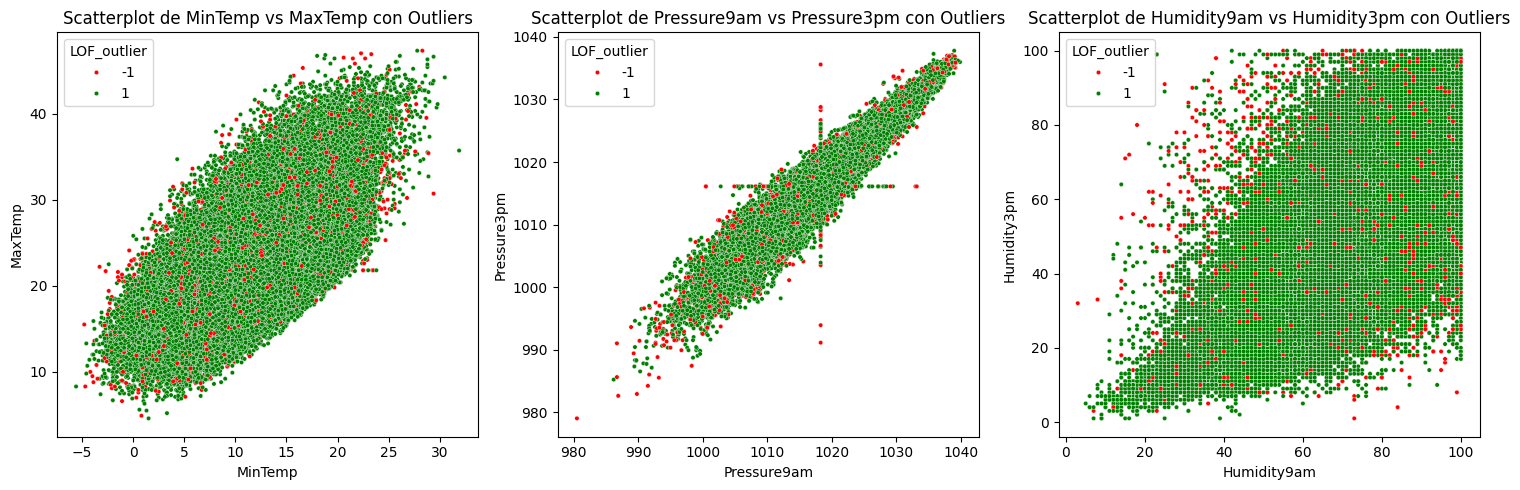

In [ ]:
par = [('MinTemp', 'MaxTemp'), ('Pressure9am', 'Pressure3pm'), ('Humidity9am', 'Humidity3pm')]

plt.figure(figsize=(15, 5)) # Agrandar figura

for i, (x, y) in enumerate(par):
  plt.subplot(1, 3, i + 1)  # Crear subgraficos
  sns.scatterplot(data=df, x=x, y=y, hue='LOF_outlier', palette={1: 'green', -1: 'red'}, s=10)
  plt.title(f'Scatterplot de {x} vs {y} con Outliers')
  plt.xlabel(x)
  plt.ylabel(y)

plt.tight_layout()
plt.show()

In [ ]:
# Nos quedamos con los que no son outliers y volvemos al dataset original
inlier_index = df[df['LOF_outlier'] == 1].index
data_clean = data.loc[inlier_index].copy()

data.shape

(71595, 23)

## Generación de nuevos features

Generamos la variable Season, que representa las estaciones del año segun el mes.

In [ ]:
month_to_season = {
    1: 'Summer', 2: 'Summer', 12: 'Verano',
    3: 'Fall', 4: 'Fall', 5: 'Fall',
    6: 'Winter', 7: 'Winter', 8: 'Winter',
    9: 'Spring', 10: 'Spring', 11: 'Spring'
}

data_clean['Season'] = data_clean['Date'].dt.month.map(month_to_season)

# Entrenamiento y predicción

## Arbol de decisión

In [ ]:
from sklearn.model_selection import train_test_split

# Binarizamos las variables RainToday y RainTomorrow
data_clean['RainToday'] = data_clean['RainToday'].apply(lambda x: 1 if x == 'Yes' else 0)
data_clean['RainTomorrow'] = data_clean['RainTomorrow'].apply(lambda x: 1 if x == 'Yes' else 0)

data_clean_encoded = data_clean.copy()
# Dropeamos Date, no sirve para el analisis.
data_clean_encoded = data_clean_encoded.drop('Date', axis=1)
# One Hot encoding para las categoricas que vamos a utilizar
data_clean_encoded = pd.get_dummies(data_clean_encoded, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm','Season'], drop_first=True)

x = data_clean_encoded.drop(['RainTomorrow'], axis=1)

y = data_clean_encoded['RainTomorrow']

# Separar en train y test, size=0,2 (20%), random_state=42 para fijar la aleatoreidad, stratify para mantener proporciones entre train y test
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score, precision_score
import joblib

# Posibles hiperparametros
param_distributions = {
    'criterion': ['entropy'],
    'max_depth': randint(5,20),
    'min_samples_leaf': randint(5, 40),
    'min_samples_split': randint(5, 40)
}
# Ajustamos los pesos de cada clase en base al desbalance
arbol = DecisionTreeClassifier(random_state=42, class_weight='balanced')
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Buscamos el mejor modelo utilizando como parametro el f1 score
modelo = RandomizedSearchCV(estimator = arbol, param_distributions=param_distributions, n_iter=30, cv=cv, random_state=42, n_jobs=-1, scoring=make_scorer(f1_score))
modelo.fit(x_train, y_train)

mejor_modelo_dt = modelo.best_estimator_
print("Mejores hiperparámetros:", modelo.best_params_)

joblib.dump(modelo, "modelo_arbol_de_decision.joblib")

Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 29, 'min_samples_split': 18}


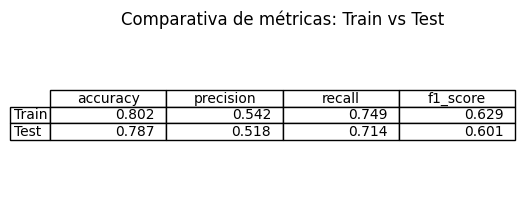

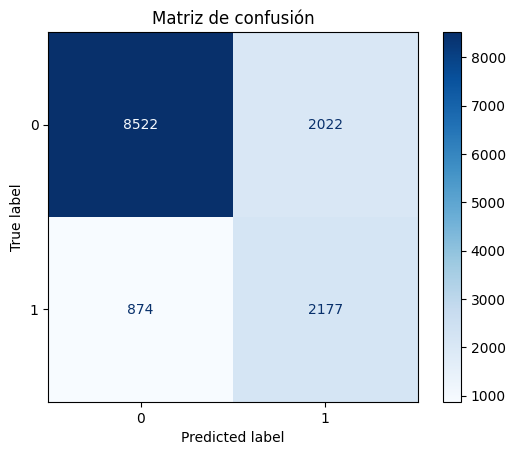

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score


# Predicciones
y_test_pred = mejor_modelo_dt.predict(x_test)
y_train_pred = mejor_modelo_dt.predict(x_train)

def testear_clasificacion(y_train, y_test, y_train_pred, y_test_pred):
  # Métricas
  metrics = {
      "accuracy": [
          accuracy_score(y_train, y_train_pred),
          accuracy_score(y_test, y_test_pred)
      ],
      "precision": [
          precision_score(y_train, y_train_pred),
          precision_score(y_test, y_test_pred)
      ],
      "recall": [
          recall_score(y_train, y_train_pred),
          recall_score(y_test, y_test_pred)
      ],
      "f1_score": [
          f1_score(y_train, y_train_pred),
          f1_score(y_test, y_test_pred)
      ]
  }

  # Crear tabla
  results = pd.DataFrame(metrics, index=["Train", "Test"])

  # Graficar tabla
  fig, ax = plt.subplots(figsize=(6, 2))
  ax.axis('off')
  ax.axis('tight')
  ax.table(cellText=results.round(3).values,
          colLabels=results.columns,
          rowLabels=results.index,
          loc='center')
  plt.title("Comparativa de métricas: Train vs Test", pad=10)
  plt.show()


  # Graficar Matriz de confusión
  cm = confusion_matrix(y_test, y_test_pred)
  ConfusionMatrixDisplay(cm).plot(cmap='Blues')
  plt.title("Matriz de confusión")
  plt.show()

testear_clasificacion(y_train, y_test, y_train_pred, y_test_pred)

Gracias a el f1 score podemos ver que, a pesar de que el modelo no es perfecto prediciendo, no existe un overfitting. Esto es debido a que el f1 score de train y test es bastante similar.


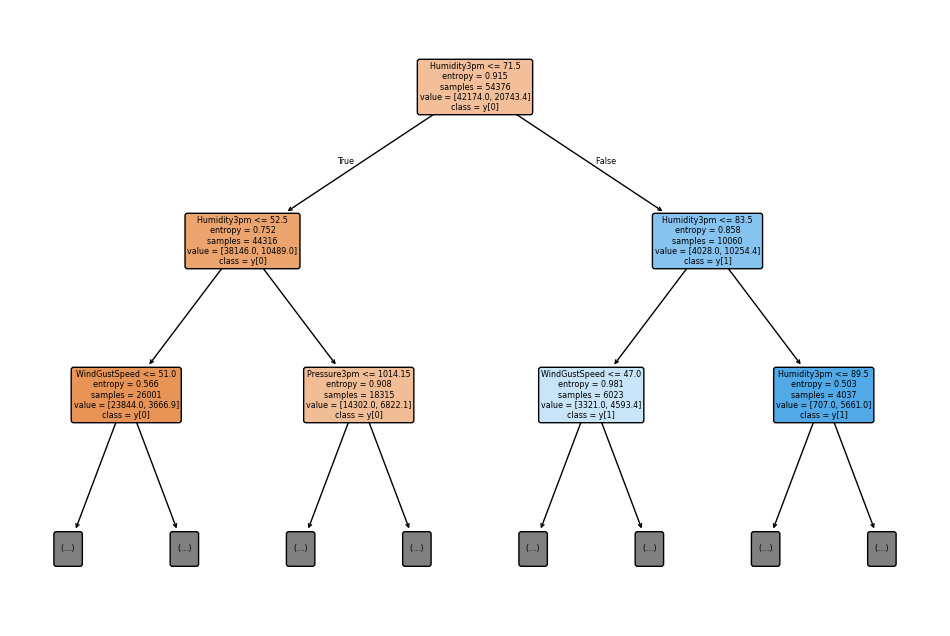

In [ ]:
from sklearn.tree import export_text
from sklearn import tree

columnas=list(x.columns)
reglas = export_text(mejor_modelo_dt, feature_names=columnas)
plt.figure(figsize=(12, 8))

tree.plot_tree(mejor_modelo_dt,
               max_depth=2,
               feature_names=columnas,
               class_names=True,
               filled=True,
               rounded=True)

plt.show()

En base a las reglas del arbol de decisión, podemos ver que una de las variables más importantes para predecir según el modelo, es Humidity3pm, no solo porque sea la que está en el primer nivel, sino porque también está en el segundo. Es bastante lógico este resultado, la humedad en el momento más tardío del día en el cual se tiene registro es un gran indicador de si al día siguiente lloverá o no.


## Random Forest

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 120}


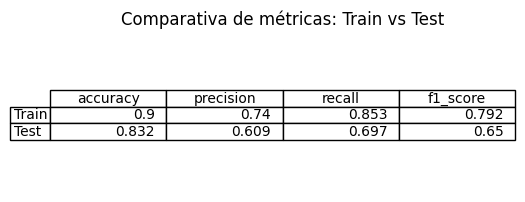

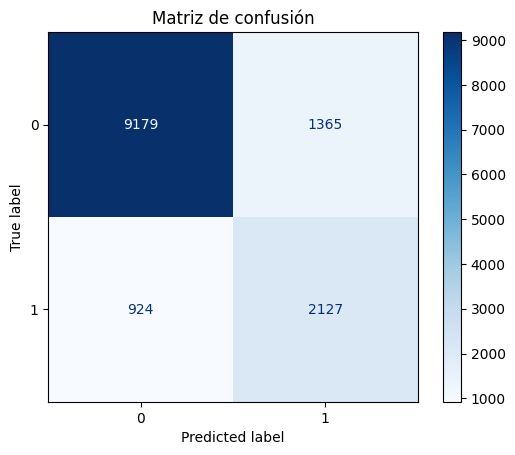

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [12, 18],
    'min_samples_split': [5,10],
    'min_samples_leaf': [5,10],
    'n_estimators': [100, 120],
}

grid_search = GridSearchCV(
    rf,
    param_grid=param_grid,
    cv=5,
    scoring=make_scorer(f1_score),
    n_jobs=-1,
    verbose=2
)

grid_search.fit(x_train, y_train)

joblib.dump(grid_search, "modelo_random_forest.joblib")

mejor_modelo_rf = grid_search.best_estimator_
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)


# Predicciones
y_test_pred = mejor_modelo_rf.predict(x_test)
y_train_pred = mejor_modelo_rf.predict(x_train)

testear_clasificacion(y_train, y_test, y_train_pred, y_test_pred)




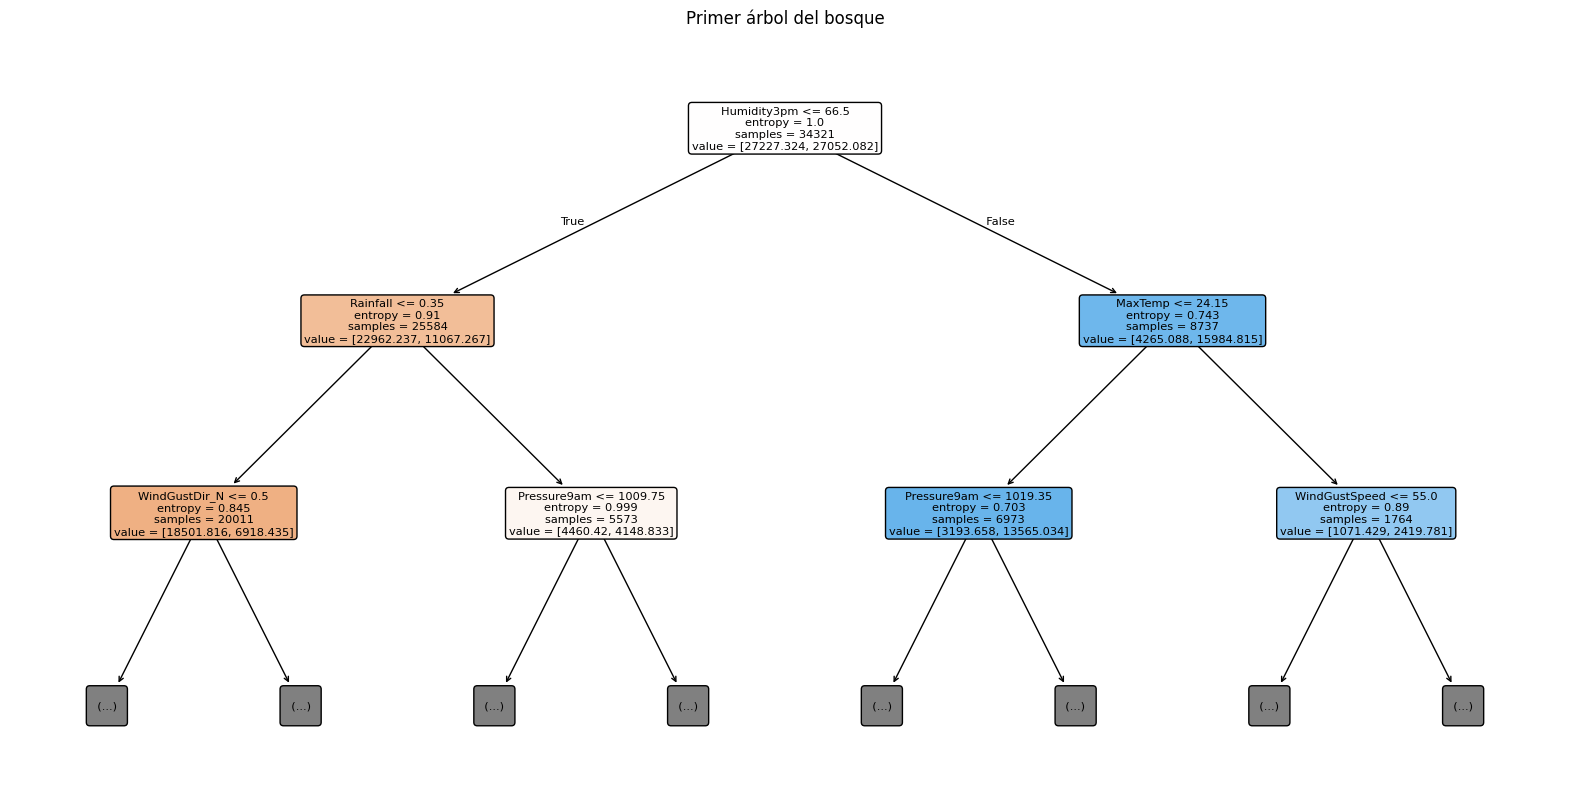

In [ ]:
one_tree = mejor_modelo_rf.estimators_[2]

plt.figure(figsize=(20, 10))
tree.plot_tree(
    one_tree,
    feature_names=x_train.columns,
    filled=True,
    rounded=True,
    max_depth=2 # Limit depth for better visualization
)
plt.title("Primer árbol del bosque")
plt.show()

Gracias a los resultados, vemos que en nuestro modelo existe un leve overfitting en el conjunto de train, pero hay mejoras respecto al arbol de decisión simple.

Ejercicio 3 - Modelo a eleccion, XGBoost

Mejores hiperparámetros encontrados:
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


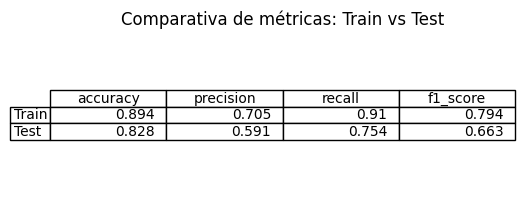

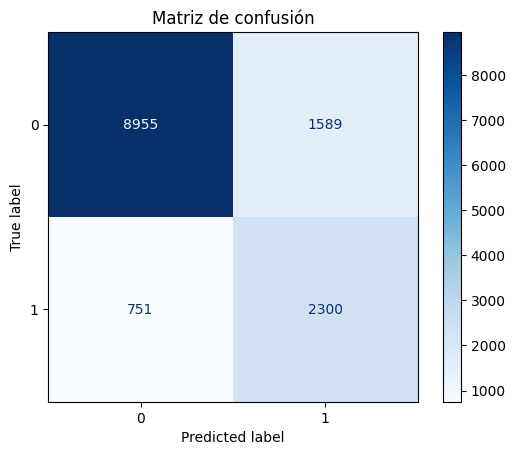

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt

# Para balancear las clases
neg = np.sum(y_train == 0)
pos = np.sum(y_train == 1)
scale_pos_weight = neg / pos

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_pos_weight
)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.7, 0.8, 0.9],
}

grid_search_xgb = GridSearchCV(
    xgb,
    param_grid=param_grid,
    scoring=make_scorer(f1_score),
    cv=5,
    n_jobs=-1,
)

grid_search_xgb.fit(x_train, y_train)

joblib.dump(grid_search_xgb, "modelo_XGBoost.joblib")

mejor_xgb = grid_search_xgb.best_estimator_
print("Mejores hiperparámetros encontrados:")
print(grid_search_xgb.best_params_)

y_test_pred = mejor_xgb.predict(x_test)
y_train_pred = mejor_xgb.predict(x_train)

testear_clasificacion(y_train, y_test, y_train_pred, y_test_pred)

